# Vizualize Means of Models for Different Contexts
* For all of the metrics

In [1]:
import os
os.chdir('./data')

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

import pandas as pd
import seaborn as sns
from glob import glob
from tabulate import tabulate
from IPython.display import Latex, display_html, display, HTML

In [3]:
SIM = pd.read_csv('SIM' + '_mean_cxt.csv', index_col=[0])
NSS = pd.read_csv('NSS' + '_mean_cxt.csv', index_col=[0])
AUC = pd.read_csv('AUC' + '_mean_cxt.csv', index_col=[0])
IG = pd.read_csv('IG' + '_mean_cxt.csv', index_col=[0])

In [4]:
SIM.index.rename('context', inplace=True)
NSS.index.rename('context', inplace=True)
AUC.index.rename('context', inplace=True)
IG.index.rename('context', inplace=True)

In [5]:
SIM

,0.0,0.3,0.5,0.7
context,,,,
all,0.357914,0.385222,0.412420,0.446859
person,0.355708,0.383674,0.411715,0.447488
no person,0.426453,0.433410,0.434375,0.427287
animal,0.341944,0.363085,0.385481,0.415656
sports,0.360939,0.385218,0.410870,0.445480
electronic,0.354191,0.381024,0.408368,0.442751


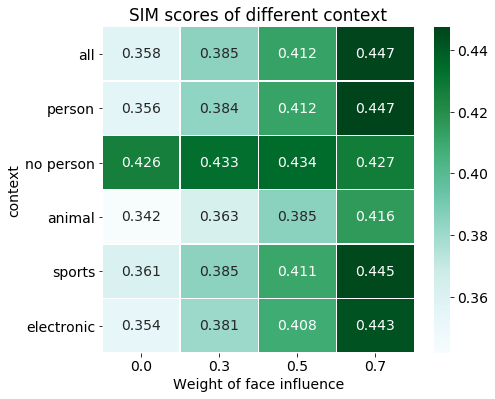

In [6]:
matplotlib.rcParams.update({'font.size': 14})

f, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax,fmt='.3f', cmap='BuGn');
plt.xlabel('Weight of face influence')
plt.title('{} scores of different context'.format('SIM'));

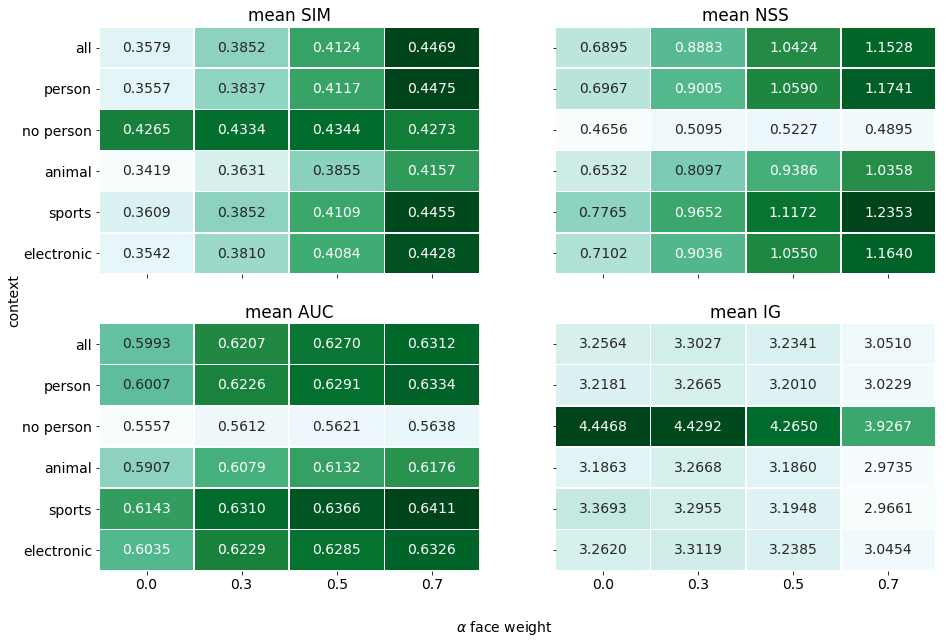

In [7]:
matplotlib.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

im = sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax[0][0], cbar=False, cmap='BuGn', fmt='.4f');
sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax[0][1], cbar=False, cmap='BuGn', fmt='.4f');
sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax[1][0], cbar=False, cmap='BuGn', fmt='.4f');
sns.heatmap(IG, annot=True, linewidths=.5, ax=ax[1][1], cbar=False, cmap='BuGn', fmt='.4f');

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax);

ax[0][0].set_title('mean {}'.format('SIM'))
ax[0][1].set_title('mean {}'.format('NSS'))
ax[1][0].set_title('mean {}'.format('AUC'))
ax[1][1].set_title('mean {}'.format('IG'))

ax[0][0].set_ylabel('')
ax[0][1].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')

fig.text(0.04, 0.5, 'context', va='center', rotation='vertical')
fig.text(0.5, 0.04, r'$\alpha$ face weight', ha='center');

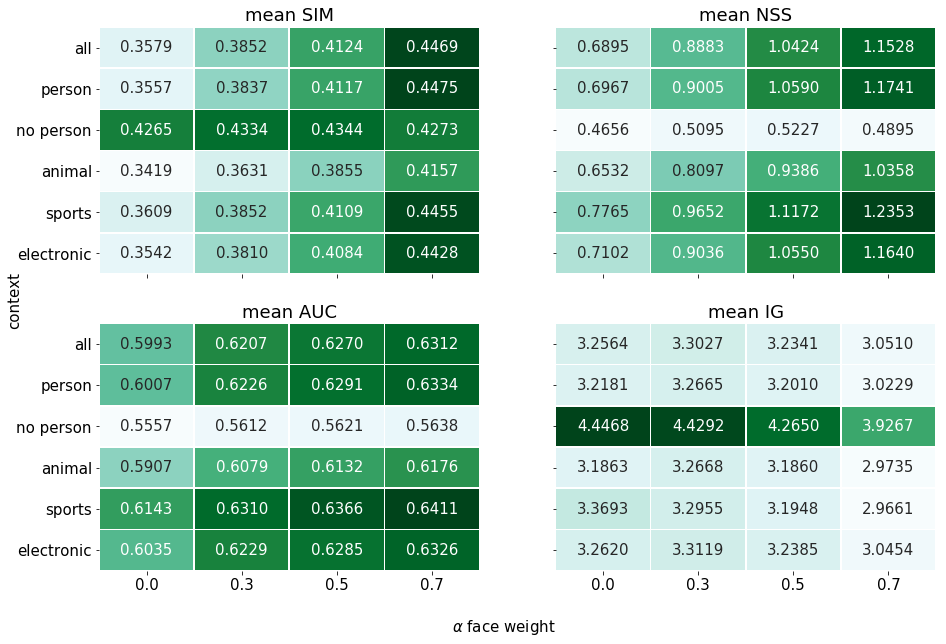

In [9]:
matplotlib.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

im = sns.heatmap(SIM, annot=True, linewidths=.5, ax=ax[0][0], cbar=False, cmap='BuGn', fmt='.4f');
sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax[0][1], cbar=False, cmap='BuGn', fmt='.4f');
sns.heatmap(AUC, annot=True, linewidths=.5, ax=ax[1][0], cbar=False, cmap='BuGn', fmt='.4f');
sns.heatmap(IG, annot=True, linewidths=.5, ax=ax[1][1], cbar=False, cmap='BuGn', fmt='.4f');

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax);

ax[0][0].set_title('mean {}'.format('SIM'))
ax[0][1].set_title('mean {}'.format('NSS'))
ax[1][0].set_title('mean {}'.format('AUC'))
ax[1][1].set_title('mean {}'.format('IG'))

ax[0][0].set_ylabel('')
ax[0][1].set_ylabel('')
ax[1][0].set_ylabel('')
ax[1][1].set_ylabel('')

# SIM
for text in ax[0][0].texts:
    if (   text.get_text() == '0.4892' 
        or text.get_text() == '0.4731' 
        or text.get_text() == '0.5192'       
        or text.get_text() == '0.4261'
        or text.get_text() == '0.4411'
        or text.get_text() == '0.4887'):
        text.set_color('red')

# NSS
for text in ax[0][1].texts:
    if (   text.get_text() == '0.7549' 
        or text.get_text() == '0.8483' 
        or text.get_text() == '0.6308' 
        or text.get_text() == '0.7191'
        or text.get_text() == '0.9345'
        or text.get_text() == '0.7712'):
        text.set_color('red')
        
# AUC
for text in ax[1][0].texts:
    if (   text.get_text() == '0.6990' 
        or text.get_text() == '0.7100' 
        or text.get_text() == '0.6783' 
        or text.get_text() == '0.6892'
        or text.get_text() == '0.7249'
        or text.get_text() == '0.6957'):
        text.set_color('red')


# IG
for text in ax[1][1].texts:
    if (   text.get_text() == '4.0376' 
        or text.get_text() == '3.9716' 
        or text.get_text() == '4.1609' 
        or text.get_text() == '3.8117'
        or text.get_text() == '3.9259'
        or text.get_text() == '4.1239'):
        text.set_color('red')
        
fig.text(0.04, 0.5, 'context', va='center', rotation='vertical')
fig.text(0.5, 0.04, r'$\alpha$ face weight', ha='center');
plt.savefig('../plots/mean_of_contexts.png', bbox_inches='tight', pad_inches=0)